<a href="https://colab.research.google.com/github/254-KIPSANG/EDA--PYTHON/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
warnings.filterwarnings("ignore")

Loading the Data

In [133]:

# read the csv file into a pandas dataframe
url = 'https://drive.google.com/file/d/1jg1uLaJZuZBZe_SLAXSMmkI-jYlXvL1a/view?usp=sharing'
file_id = url.split('/')[-2]

download_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(download_url)


Exploratory Data Analysis

In [134]:
# Print the first 5 rows of the DataFrame to inspect the data
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
# Get the shape of the DataFrame
# The shape attribute returns a tuple with the number of rows and columns in the DataFrame
df.shape


(1460, 81)

In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

***Getting the statistical summary of dataset***

In [137]:
#Using the describe() method on a pandas DataFrame to compute various summary statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


***Visualizing the correlations between numerical variables***

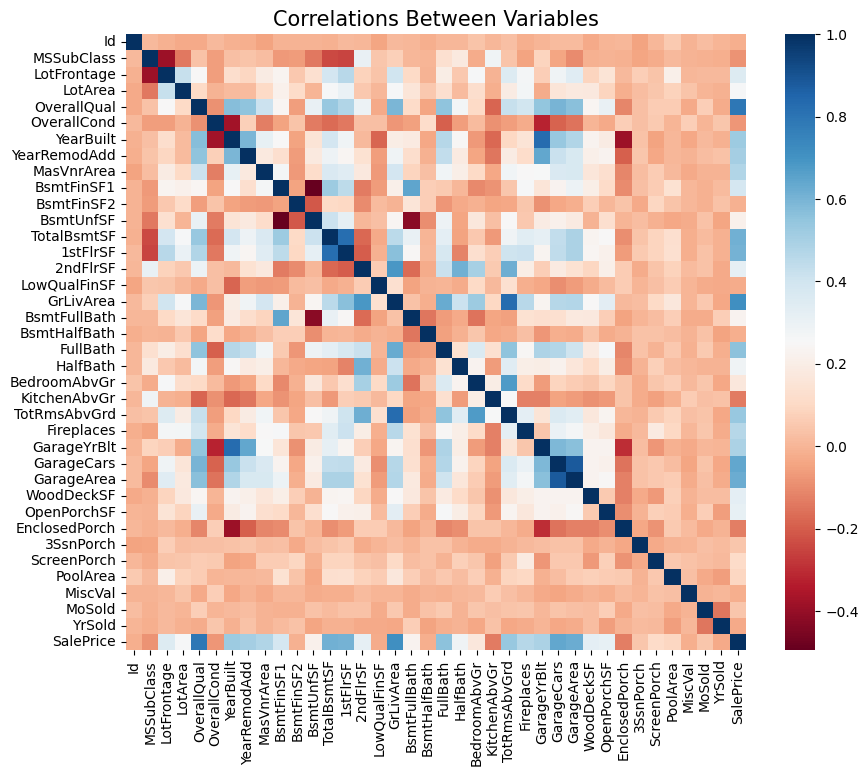

In [138]:
#plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

FEATURE SCALING

In [139]:
# Select columns with correlation coefficient greater than 0.5 or less than -0.5 with SalePrice
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)

# Select categorical columns to keep
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

# Combine important numeric and categorical columns
important_cols = important_num_cols + cat_cols

# Select only the important columns from the dataframe
df = df[important_cols]


***Checking for the missing values***

In [140]:
# Print the number of missing values in each column
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum()) # Count the number of missing values for each column
print("-"*30)

# Calculate and print the total number of missing values
print("TOTAL MISSING VALUES:", df.isna().sum().sum())

# Select only the important columns
df = df[important_cols]


Missing Values by Column
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


Data Visualization

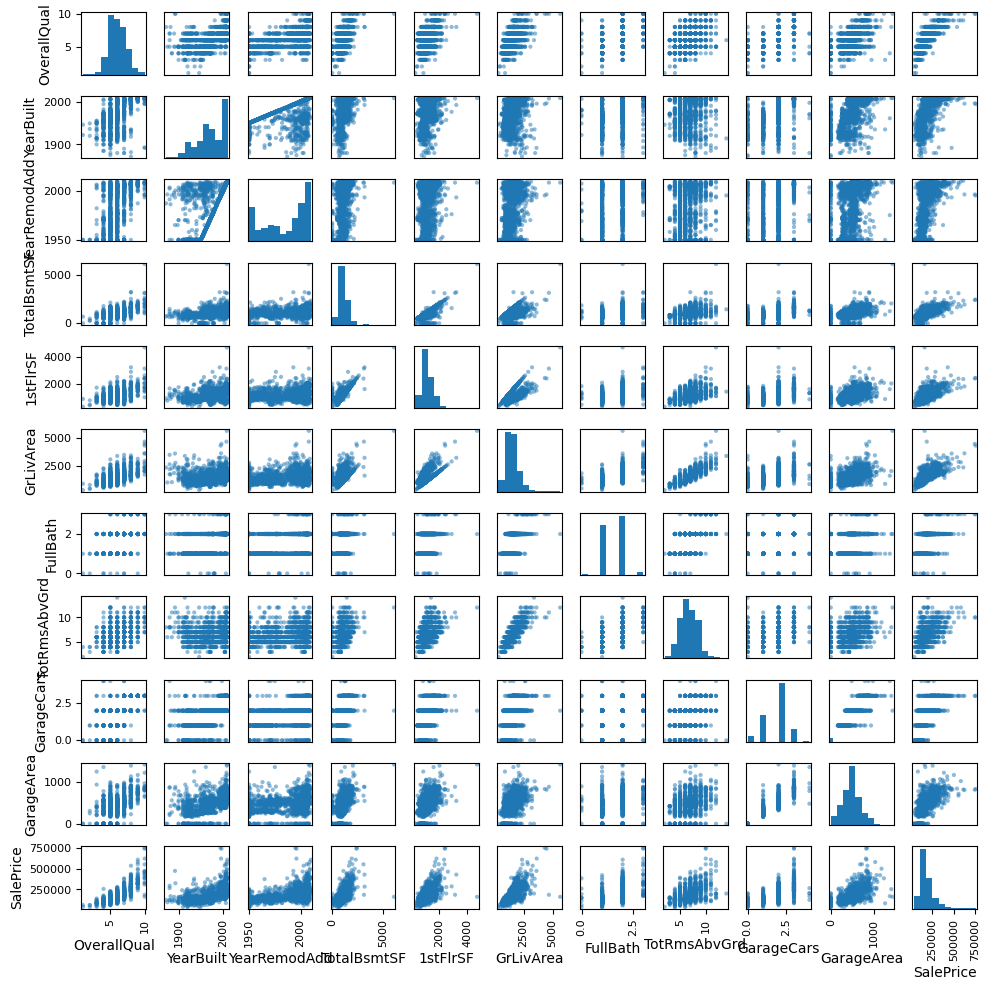

In [141]:
# Select important numerical columns
important_num_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

# Filter out rows with missing values in the selected columns
df = df[important_num_cols].dropna()

# Create a scatter matrix plot of the numerical columns
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='hist')

# Add titles to the subplots
for ax in plt.gcf().axes:
    ax.set_title(ax.get_title().replace('\n', ' '))

# Add axis labels
plt.tight_layout()

# Show the plot
plt.show()


***Visualizing the Correlation between each column and the target variable using jointplot visualization***

In [142]:
#paralllel cordinates graph

# Select important numerical columns
important_num_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

# Filter out rows with missing values in the selected columns
df = df[important_num_cols].dropna()

# Create a parallel coordinates plot
fig = px.parallel_coordinates(df, color="SalePrice", labels={"SalePrice": "Sale Price", "index": "Index"},
                              color_continuous_scale=px.colors.diverging.Tealrose, height=500)
fig.show()


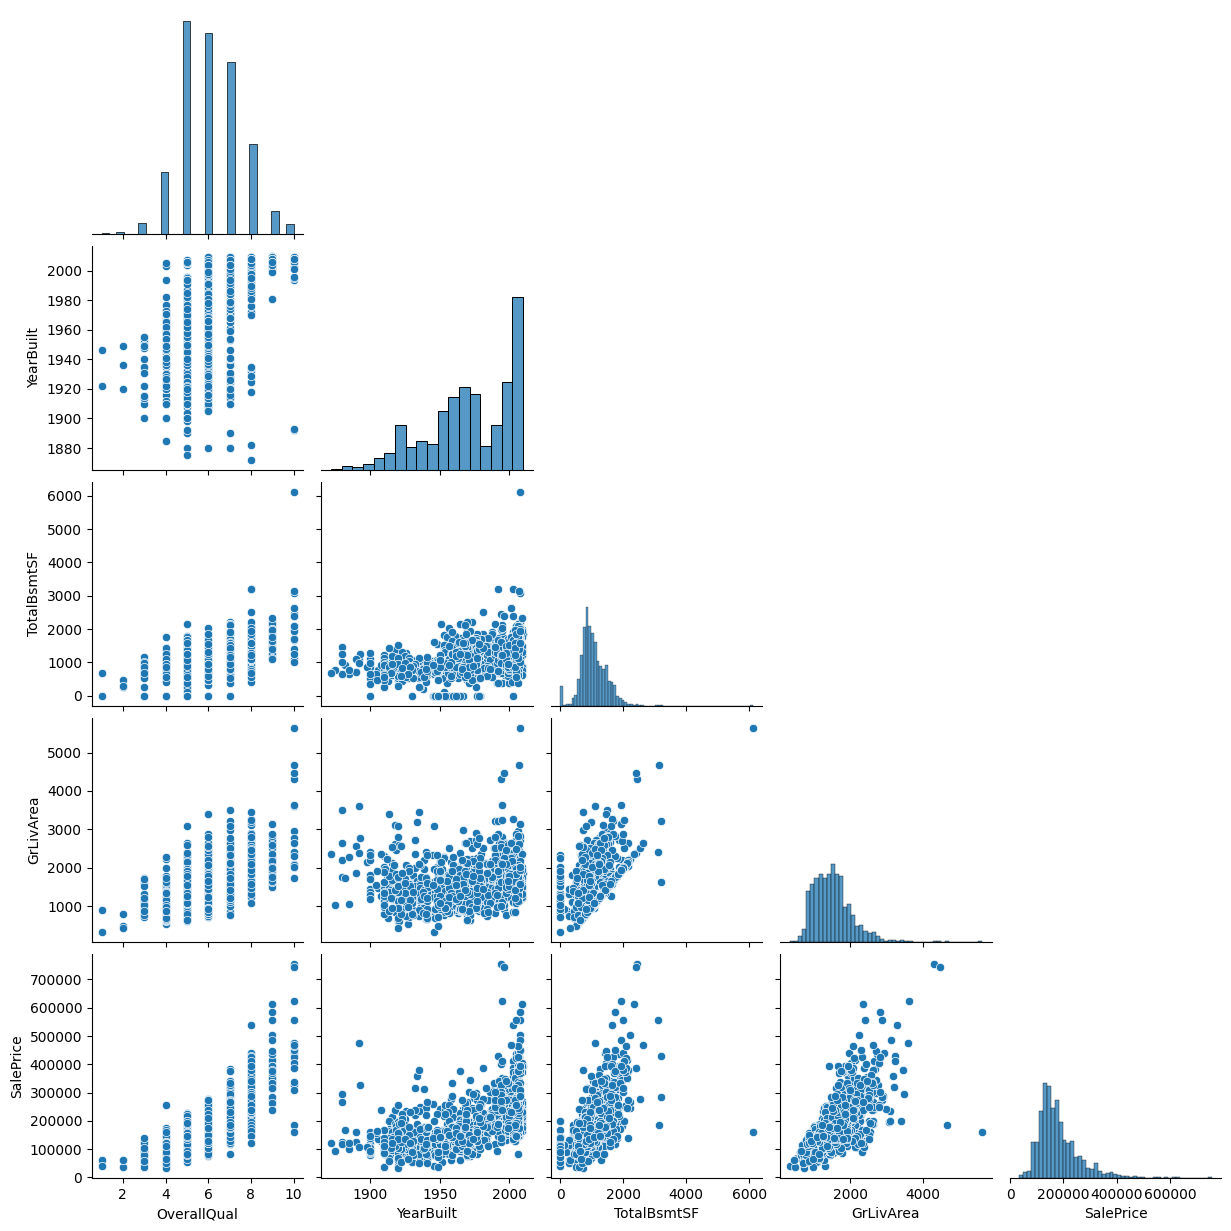

In [143]:
# Select important numerical columns
important_num_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']

# Filter out rows with missing values in the selected columns
df = df[important_num_cols].dropna()

# Create a pair plot of the numerical columns
sns.pairplot(df, vars=['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice'], corner=True)
plt.show()


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">TEST AND TRAIN DATASET Split</h1>

In [144]:
# Separate the target variable from the features
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

In [145]:
# Remove the target variable from the list of important numerical columns
important_num_cols.remove("SalePrice")

# Scale the important numerical columns using StandardScaler
scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])


***As you can see, standardization is done successfully***

In [146]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Defining several evaluation functions for convenience***

In [148]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

In [149]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">MODELLING BY VARIOUS TYPES OF REGRESSSION</h1>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [150]:

#create a Linear Regression model
lr = LinearRegression()

#fit the model to the training data
lr.fit(X_train, y_train)

#make predictions on the test data
predictions = lr.predict(X_test)

#evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

#compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

#add the results to the models dataframe
new_row = {"Model": "Linear Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

#calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

#create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

#evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

#evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

#add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

#add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

MAE: 24774.21951960476
MSE: 1558239575.1510885
RMSE: 39474.543381160074
R2 Score: 0.7968483304281098
------------------------------
RMSE Cross-Validation: 38573.182562015965
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [151]:

# create a Ridge Regression model
rr = Ridge(alpha=1.0)

# fit the model to the training data
rr.fit(X_train, y_train)

# make predictions on the test data
predictions = rr.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(rr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Ridge Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 24769.082104592002
MSE: 1558588250.7511795
RMSE: 39478.95959560206
R2 Score: 0.7968028727004105
------------------------------
RMSE Cross-Validation: 38567.47871616677
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [152]:


# create a Lasso Regression model
lasso = Lasso(alpha=0.1)

# fit the model to the training data
lasso.fit(X_train, y_train)

# make predictions on the test data
predictions = lasso.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Lasso Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 24774.197623502885
MSE: 1558240905.8848305
RMSE: 39474.56023675033
R2 Score: 0.7968481569369563
------------------------------
RMSE Cross-Validation: 38573.167133391464
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net Regression: </h2>

In [153]:

# create an Elastic Net Regression model
enr = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

# fit the model to the training data
enr.fit(X_train, y_train)

# make predictions on the test data
predictions = enr.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(enr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Elastic Net Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 24744.833462977283
MSE: 1560319639.1630545
RMSE: 39500.88149855715
R2 Score: 0.7965771471751711
------------------------------
RMSE Cross-Validation: 38542.064102068085
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">DECISION TREE REGRESSION</h2>

In [154]:

# create a Decision Tree Regression model
dtr = DecisionTreeRegressor(random_state=42)

# fit the model to the training data
dtr.fit(X_train, y_train)

# make predictions on the test data
predictions = dtr.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(dtr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Decision Tree Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 25994.25799086758
MSE: 1897834585.3120244
RMSE: 43564.14334417727
R2 Score: 0.7525744624089461
------------------------------
RMSE Cross-Validation: 42007.777496286406
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [155]:


# create a Random Forest Regression model
rfr = RandomForestRegressor(random_state=42)

# fit the model to the training data
rfr.fit(X_train, y_train)

# make predictions on the test data
predictions = rfr.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(rfr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Random Forest Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 18841.5205789302
MSE: 857229392.4977852
RMSE: 29278.48002369292
R2 Score: 0.8882408167080876
------------------------------
RMSE Cross-Validation: 32131.177218897046
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Gradient Boosting Regression</h2>


In [156]:


# create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor(random_state=42)

# fit the model to the training data
gbr.fit(X_train, y_train)

# make predictions on the test data
predictions = gbr.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(gbr)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": "Gradient Boosting Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 19048.512552328833
MSE: 856045188.7177111
RMSE: 29258.249925751046
R2 Score: 0.8883952043766283
------------------------------
RMSE Cross-Validation: 29495.289352598502
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regression</h2>

In [157]:

#create an XGBoost Regression model
xgb = XGBRegressor(random_state=42)

#fit the model to the training data
xgb.fit(X_train, y_train)

#make predictions on the test data
predictions = xgb.predict(X_test)

#evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

#compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

#add the results to the models dataframe
new_row = {"Model": "XGBoost Regression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

#calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

#create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

#evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

#evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

#add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

#add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

MAE: 19885.991277825342
MSE: 890714600.8874382
RMSE: 29844.842115304247
R2 Score: 0.8838752646461326
------------------------------
RMSE Cross-Validation: 32923.53252425864
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Polynomial Regression</h2>

In [158]:


# create a polynomial regression model
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# fit the model to the training data
polyreg.fit(X_train, y_train)

# make predictions on the test data
predictions = polyreg.predict(X_test)

# evaluate the model using the evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

# compute the RMSE using cross-validation
rmse_cross_val = rmse_cv(polyreg)
print("RMSE Cross-Validation:", rmse_cross_val)

# add the results to the models dataframe
new_row = {"Model": f"Polynomial Regression (degree={degree})","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

# calculate the median and mean baseline predictions
median_baseline = np.median(y_train)
mean_baseline = np.mean(y_train)

# create arrays of median and mean predictions for the test set
median_predictions = np.full(len(y_test), median_baseline)
mean_predictions = np.full(len(y_test), mean_baseline)

# evaluate the median baseline using the evaluation metrics
mae_median, mse_median, rmse_median, r_squared_median = evaluation(y_test, median_predictions)
print("Median Baseline MAE:", mae_median)
print("Median Baseline MSE:", mse_median)
print("Median Baseline RMSE:", rmse_median)
print("Median Baseline R2 Score:", r_squared_median)
print("-"*30)

# evaluate the mean baseline using the evaluation metrics
mae_mean, mse_mean, rmse_mean, r_squared_mean = evaluation(y_test, mean_predictions)
print("Mean Baseline MAE:", mae_mean)
print("Mean Baseline MSE:", mse_mean)
print("Mean Baseline RMSE:", rmse_mean)
print("Mean Baseline R2 Score:", r_squared_mean)
print("-"*30)

# add the median baseline results to the models dataframe
new_row = {"Model": "Median Baseline","MAE": mae_median, "MSE": mse_median, "RMSE": rmse_median, "R2 Score": r_squared_median, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)

# add the mean baseline results to the models dataframe
new_row = {"Model": "Mean Baseline","MAE": mae_mean, "MSE": mse_mean, "RMSE": rmse_mean, "R2 Score": r_squared_mean, "RMSE (Cross-Validation)": np.nan}
models = models.append(new_row, ignore_index=True)


MAE: 21556.0121076762
MSE: 1168470784.1297913
RMSE: 34182.90192669124
R2 Score: 0.84766348228646
------------------------------
RMSE Cross-Validation: 33459.403932740075
Median Baseline MAE: 59568.25
Median Baseline MSE: 7861866593.5239725
Median Baseline RMSE: 88667.16750592619
Median Baseline R2 Score: -0.024971608920279387
------------------------------
Mean Baseline MAE: 62575.926451960964
Mean Baseline MSE: 7677095207.783831
Mean Baseline RMSE: 87619.03450611533
Mean Baseline R2 Score: -0.0008824918802490256
------------------------------


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [159]:

#Sort the models based on their RMSE scores using cross-validation
models.dropna(inplace=True)
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
18,Gradient Boosting Regression,19048.512552,8.560452e+08,29258.249926,0.888395,29495.289353
15,Random Forest Regression,18841.520579,8.572294e+08,29278.480024,0.888241,32131.177219
21,XGBoost Regression,19885.991278,8.907146e+08,29844.842115,0.883875,32923.532524
24,Polynomial Regression (degree=2),21556.012108,1.168471e+09,34182.901927,0.847663,33459.403933
9,Elastic Net Regression,24744.833463,1.560320e+09,39500.881499,0.796577,38542.064102
3,Ridge Regression,24769.082105,1.558588e+09,39478.959596,0.796803,38567.478716
6,Lasso Regression,24774.197624,1.558241e+09,39474.560237,0.796848,38573.167133
0,Linear Regression,24774.219520,1.558240e+09,39474.543381,0.796848,38573.182562
12,Decision Tree Regression,25994.257991,1.897835e+09,43564.143344,0.752574,42007.777496


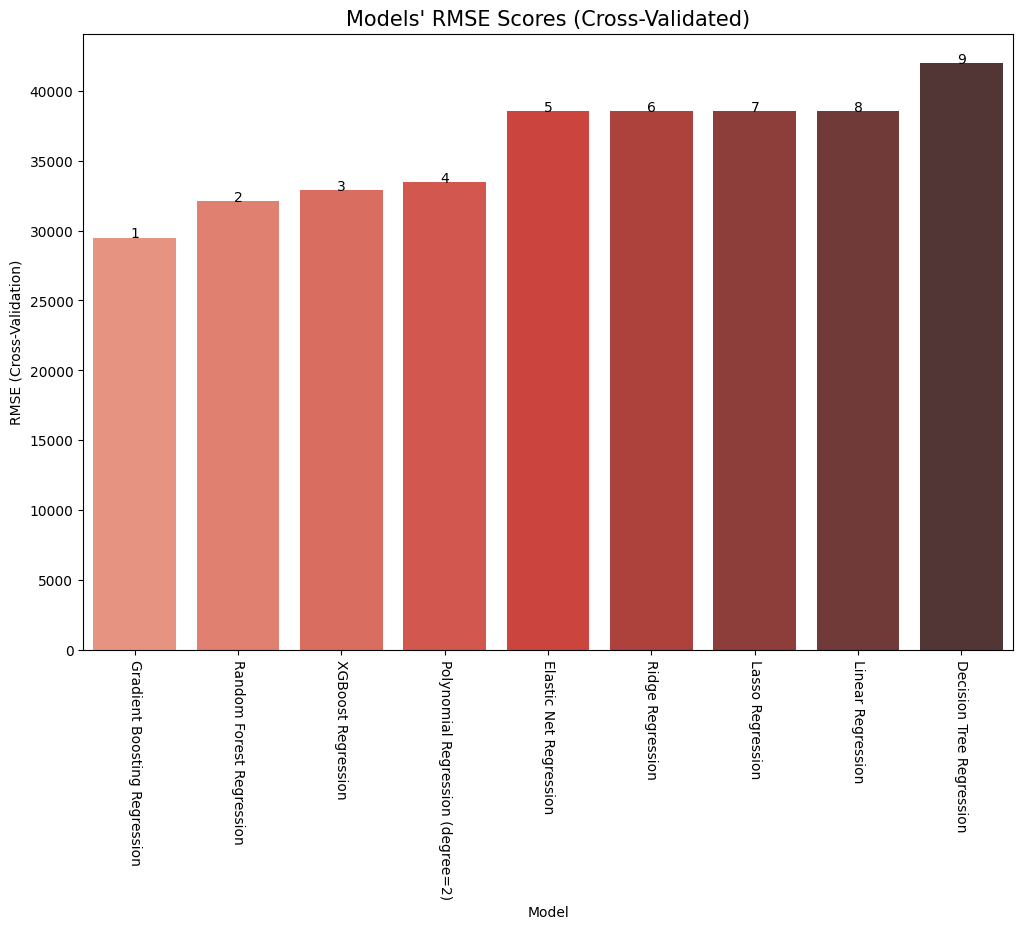

In [161]:
# Sort the models by their RMSE scores in ascending order
models_sorted = models.sort_values(by="RMSE (Cross-Validation)")

# Create a bar plot to visualize the RMSE scores for each model
plt.figure(figsize=(12,8))

# Use the seaborn library to create the plot, and set the color palette to 'Greens_d'
sns.barplot(x=models_sorted["Model"], y=models_sorted["RMSE (Cross-Validation)"], palette="Reds_d")

# Set the plot title and adjust the font size
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)

# Rotate the x-axis labels by 90 degrees and adjust their font size
plt.xticks(rotation=-90, size=10)

# Add numbering to the x-axis labels based on the model's ranking by RMSE score
for i, model in enumerate(models_sorted["Model"]):
    plt.text(i, models_sorted.loc[models_sorted["Model"]==model, "RMSE (Cross-Validation)"]+0.05, str(i+1), ha='center', size=10)

# Display the plot
plt.show()
